In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# @title
# Auxiliar function
def display_as_table(df, title, shape=(10,5)):
  # Create a figure and axes
  fig, ax = plt.subplots(figsize=shape, facecolor="#00000000")

  ax.axis('off')
  ax.axis('tight')

  table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

  table.auto_set_font_size(False)
  table.set_fontsize(10)

  for col_idx, col_name in enumerate(df.columns):
      if col_name == "top":
          for row_idx in range(len(df) + 1):
              cell_idx = (row_idx, col_idx)
              if cell_idx in table._cells:
                  table._cells[cell_idx].set_width(0.4)

  fig.suptitle(title)
  fig.tight_layout()

  plt.show()

# EDA Annotations Original

Original annotations provided by Vindr Mammo

In [59]:
df = pd.read_csv('finding_annotations.csv')
display(df.head())

print("Data Shape:", df.shape)

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


Data Shape: (20486, 16)


## Descripción de columnas

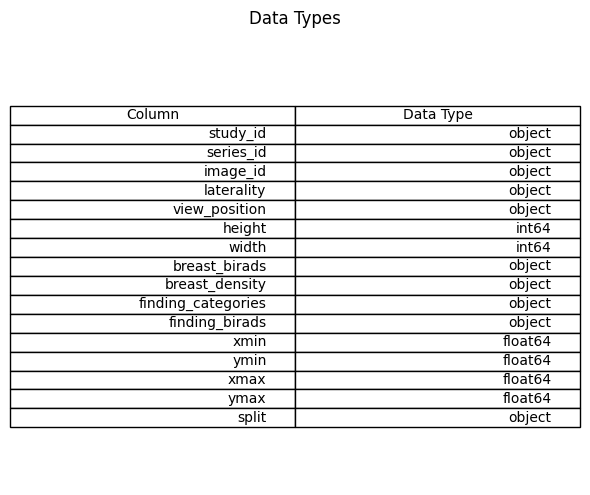

In [ ]:
display_as_table(pd.DataFrame
                 .from_dict(df.dtypes.to_dict(), orient='index', columns=['Data Type'])
                 .reset_index().rename(columns={'index': 'Column'}),
                 "Data Types",
                 shape=(6, 5))

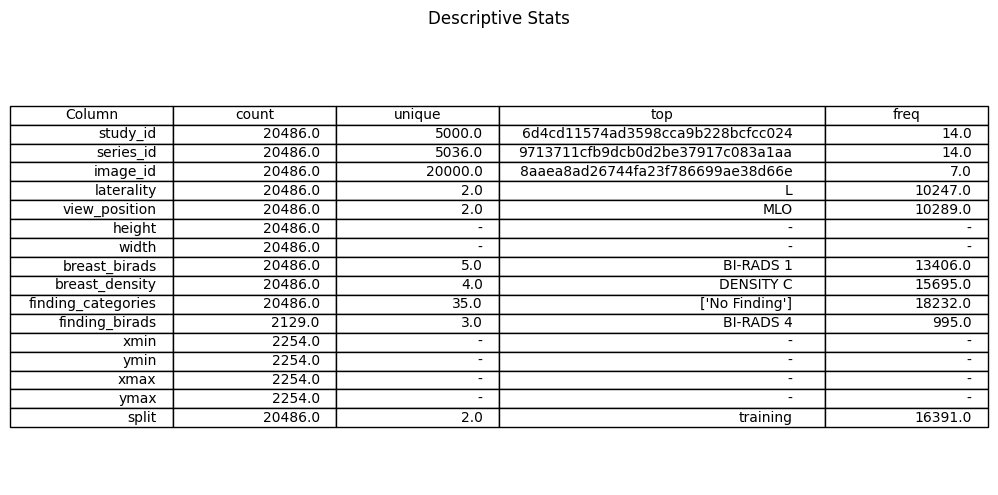

In [ ]:
df_desc = (df.describe(include='all').T.reset_index()
          .rename(columns={'index': 'Column'})
          [["Column", "count", "unique", "top", "freq"]])
df_desc = df_desc.infer_objects(copy=False).fillna('-')
display_as_table(df_desc, "Descriptive Stats")

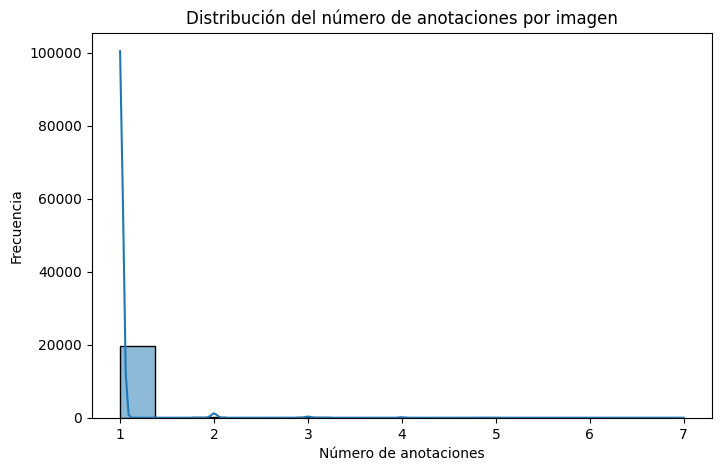

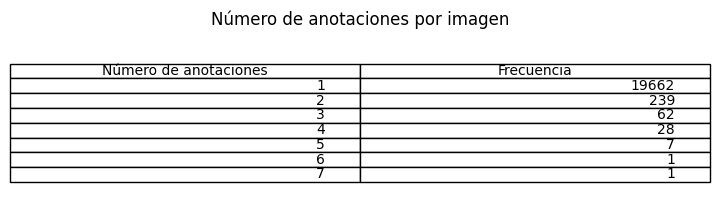

In [ ]:
plt.figure(figsize=(8,5))

annot_per_imageid = df.groupby("image_id").size()
sns.histplot(annot_per_imageid, kde=True)
plt.title("Distribución del número de anotaciones por imagen")
plt.xlabel("Número de anotaciones")
plt.ylabel("Frecuencia")
plt.show()

annot_per_imageid = annot_per_imageid.value_counts()
display_as_table(
    annot_per_imageid.to_frame().reset_index()
    .rename(columns={
        "index": "Número de anotaciones",
        "count": "Frecuencia"
        }),
    "Número de anotaciones por imagen",
    shape=(7.3,2))

## Datos faltantes

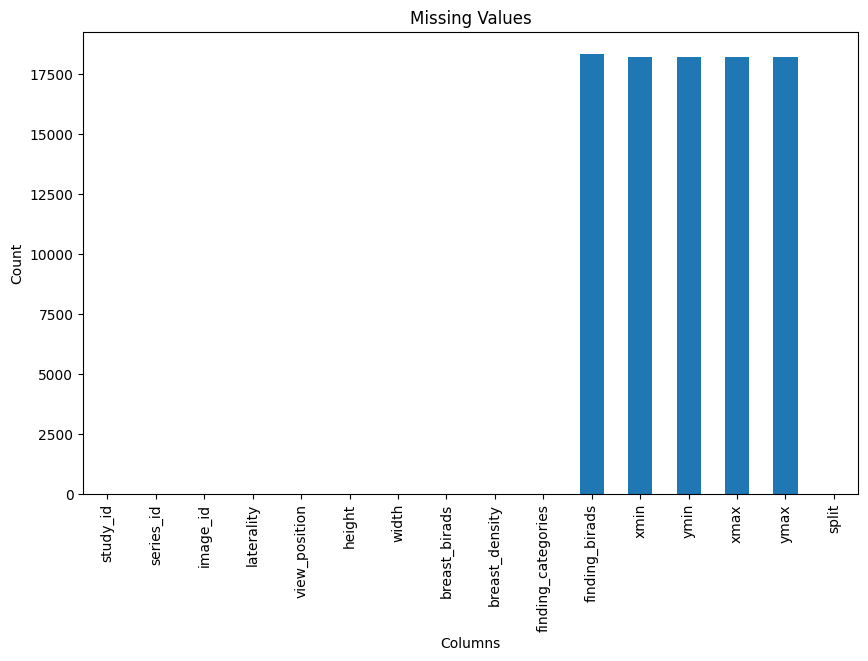

In [ ]:
plt.figure(figsize=(10, 6), facecolor="#00000000")
df.isnull().sum().plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

## Variables Categóricas

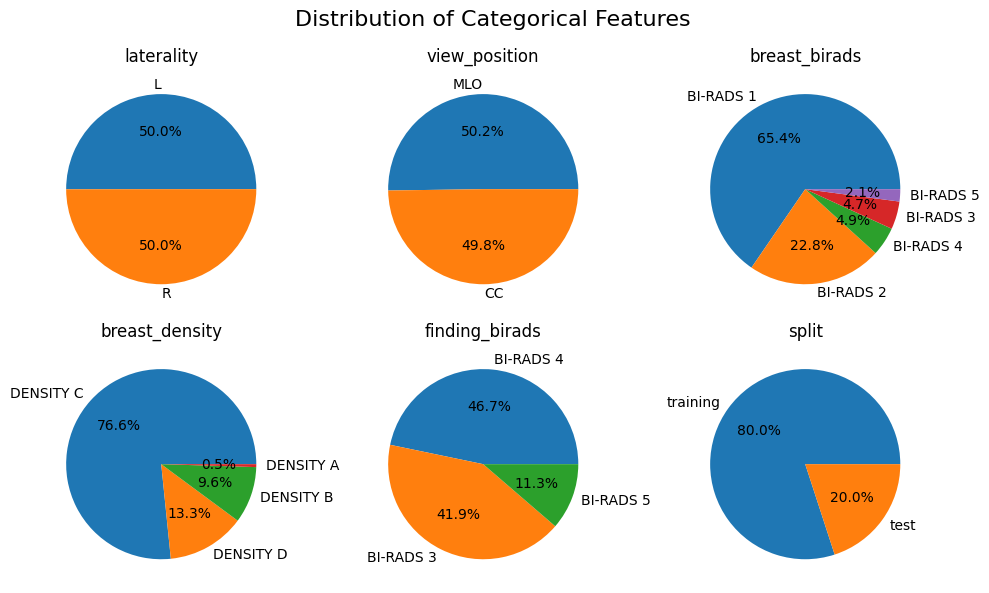

In [60]:
# Unique Values for categorical features
categorical_cols = ['laterality', 'view_position', 'breast_birads', 'breast_density', 'finding_birads', 'split']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Distribution of Categorical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Variables Numéricas

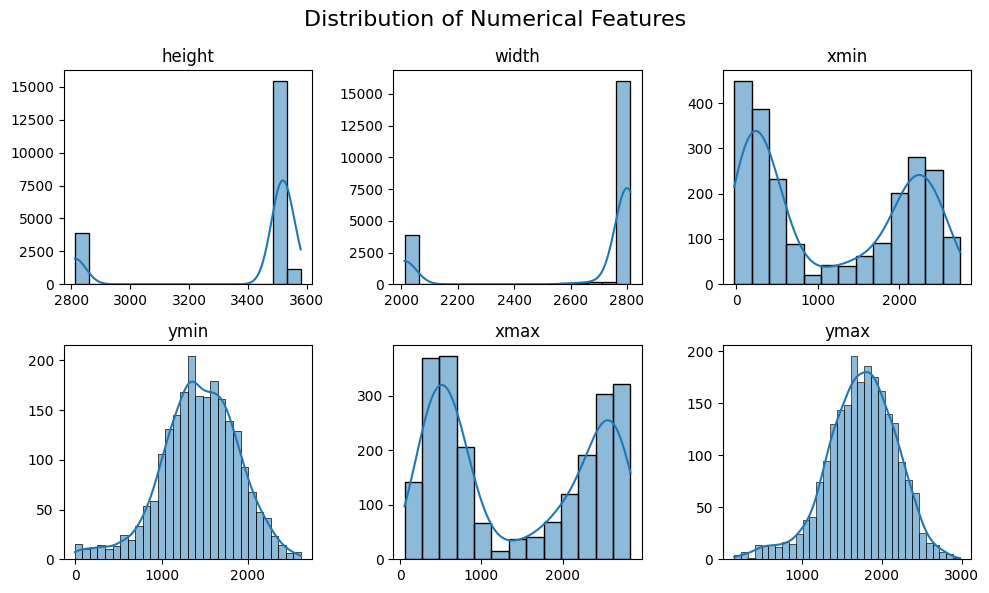

In [ ]:
numerical_features = ['height', 'width', 'xmin', 'ymin', 'xmax', 'ymax']

# histograms
plt.figure(figsize=(10, 6), facecolor="#00000000")
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

- Las imágenes suelen tener dimensiones similares, como indican los dos picos en las gráficas de Alto y Ancho.
- `xmin` tiene dos picos, entre 0-500 y alrededor de 2500. `xmax` presenta una distribución similar, excepto que cada pico se encuentra ligeramente más a la derecha que los de `xmin`. Esto va acorde a la descripción de cada coordenada, puesto que marcan el inicio y final de las caja delimitadoras.
- `ymin` y `ymax` presentan distribuciones aparentemente simétricas, ambas centradas en un punto entre 250-350, aunque ligeramente mayor para `ymax`. Esto parece indicar de que la ubicación vertical de las cajas no presenta gran variación.

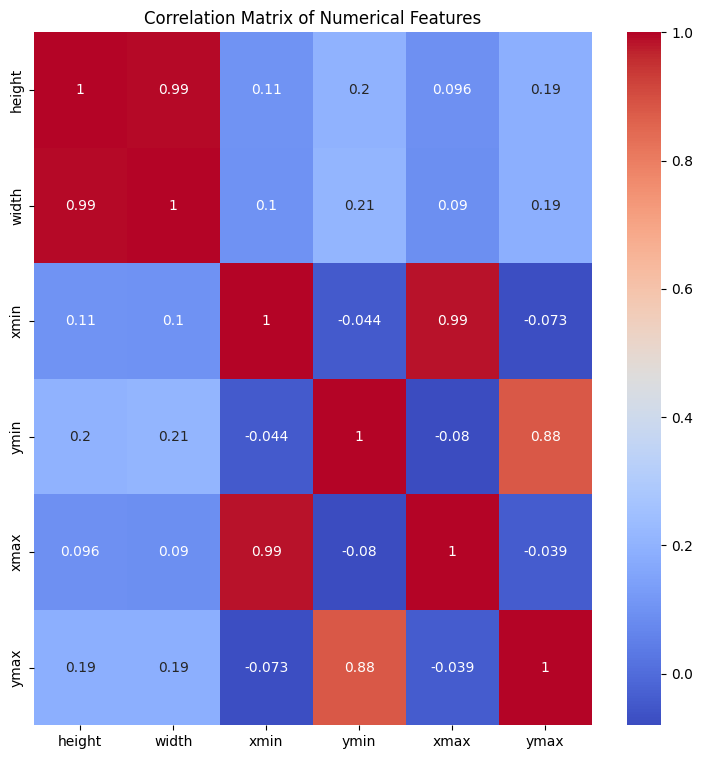

In [ ]:
# correlation matrix heatmap (for all numerical features)
plt.figure(figsize=(9, 9), facecolor="#00000000")
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

No existe correlación significativa entre variables que ya no estén de por sí relacionadas conceptualmente. Las correlaciones fuertes que pueden verse (`xmin`, `xmax`; `ymin`, `ymax`), se deben a que los conceptos que representan están relacionados entre sí.

## Relaciones entre Variables


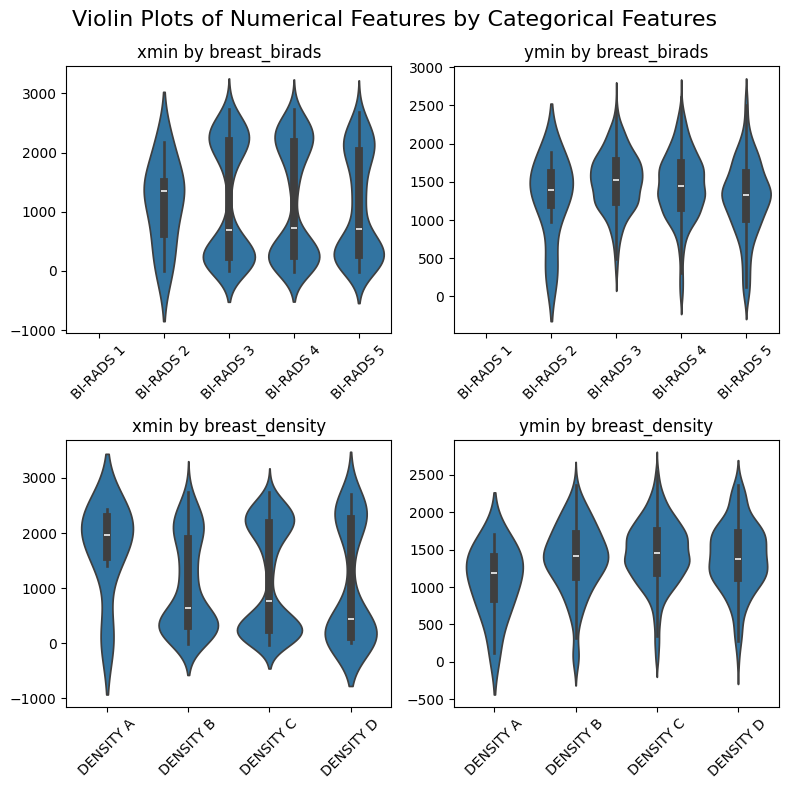

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), facecolor="#00000000")
axes = axes.flatten()
categorical_cols = ['breast_birads', 'breast_density']
i = 0
for cat_col in categorical_cols:
    for num_col in ['xmin', 'ymin']:
        sorted_categories = sorted(df[cat_col].dropna().unique())
        sns.violinplot(x=cat_col, y=num_col, data=df, order=sorted_categories, ax=axes[i])
        axes[i].set_title(f'{num_col} by {cat_col}')
        axes[i].tick_params(axis='x', labelrotation=45)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        i += 1

fig.suptitle('Violin Plots of Numerical Features by Categorical Features', fontsize=16)
fig.tight_layout()
plt.show()

## Correlación con tipo de caso (`finding_categories`)

In [ ]:
df_encoded = df.drop(columns=["study_id", "series_id", "image_id", "height", "width", "split", "finding_categories"])
label_encoder = LabelEncoder()

# Encode categorical features
categorical_cols = ['laterality', 'view_position', 'breast_birads', 'breast_density', 'finding_birads']
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

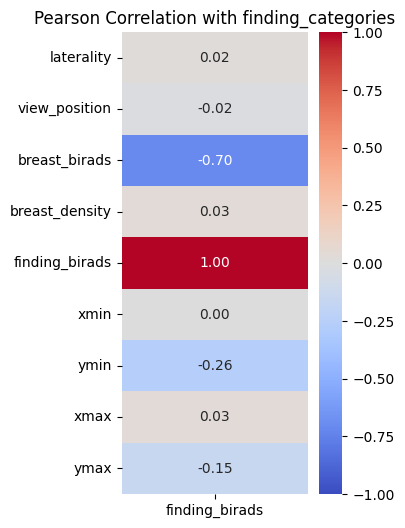

In [ ]:
# Calculate Pearson correlation
plt.figure(figsize=(3, 6), facecolor="#00000000")
sns.heatmap(df_encoded.corr()[['finding_birads']], annot=True,
            cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Pearson Correlation with finding_categories')
plt.show()

- No existe correlación significativa entre el diagnóstivo del caso y gran parte de características de las anomalías detectadas.
- La excepción a esto son `breast_birads` y `finding_birads`, pero estas mismas variables también hacen parte del diagnóstico, indicando la gravedad del mismo, por lo que no puede decirse que alguna de las características en la tabla facilite el diagnóstico como tal.